In [10]:
import pandas as pd
from pycaret.classification import *

In [11]:
clth = pd.read_csv('final_test.csv')

In [12]:
clth.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [13]:
clth.shape

(119734, 4)

In [14]:
clth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [15]:
clth.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [16]:
train = clth.sample(frac=0.70, random_state=1234)
test = clth.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

print("Training Data:-" + " " + str(train.shape))
print("Testing Data:-" + " " + str(test.shape))

Training Data:- (83814, 4)
Testing Data:- (35920, 4)


In [17]:
setp = setup(data=train, target='size', numeric_imputation='mean', 
             normalize=True, remove_outliers=True, remove_multicollinearity=True,
             fix_imbalance=True, fold_shuffle=True, fold_strategy='stratifiedkfold', 
             transformation=True, multicollinearity_threshold=0.8, log_experiment=True, session_id=123, ignore_low_variance=True
)

,Description,Value
0,session_id,123
1,Target,size
2,Target Type,Multiclass
3,Label Encoded,"L: 0, M: 1, S: 2, XL: 3, XXL: 4, XXS: 5, XXXL: 6"
4,Original Data,"(83814, 4)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
knn = create_model('knn', 10)
knn_turn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4580,0.7893,0.4045,0.4686,0.4607,0.3419,0.3429
1,0.4726,0.7945,0.4132,0.4793,0.4748,0.3580,0.3583
2,0.4557,0.7893,0.3987,0.4630,0.4575,0.3381,0.3387
3,0.4645,0.7888,0.4117,0.4725,0.4662,0.3496,0.3504
4,0.4745,0.7919,0.4618,0.4854,0.4775,0.3616,0.3626
5,0.4683,0.7935,0.4159,0.4803,0.4714,0.3547,0.3557
6,0.4619,0.7918,0.4068,0.4698,0.4638,0.3461,0.3469
7,0.4658,0.7889,0.4071,0.4735,0.4681,0.3505,0.3510
8,0.4644,0.7930,0.4067,0.4733,0.4670,0.3490,0.3496
9,0.4667,0.7933,0.4136,0.4785,0.4694,0.3530,0.3543


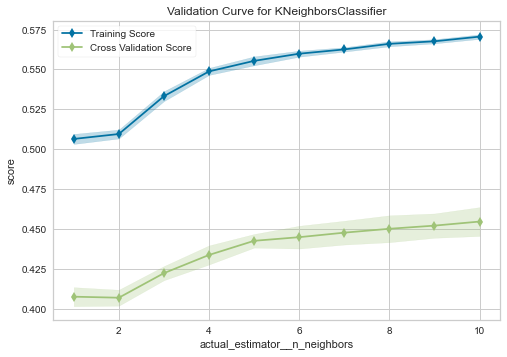

In [19]:
plot_model(knn_turn, plot='vc')

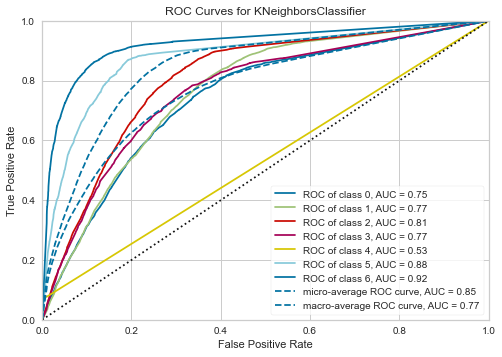

In [20]:
plot_model(knn_turn, plot='auc')

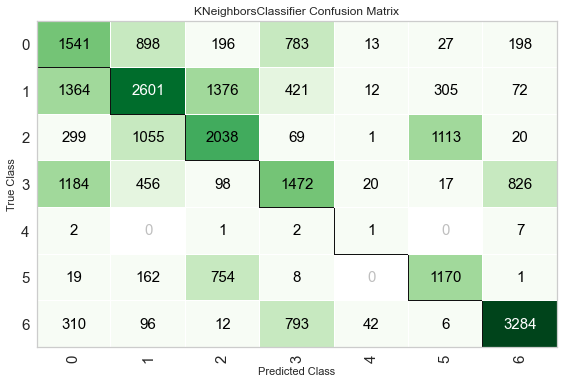

In [21]:
plot_model(knn_turn, plot='confusion_matrix')

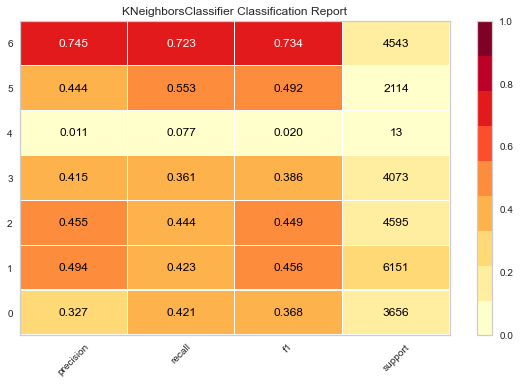

In [22]:
plot_model(knn_turn, plot='class_report')

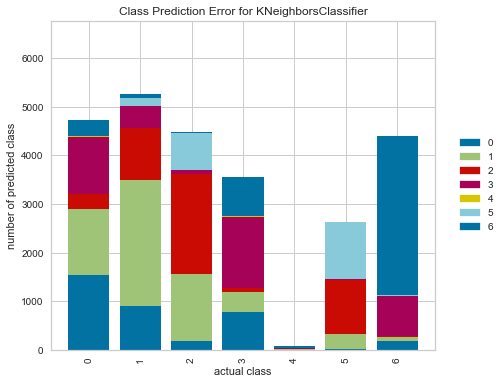

In [23]:
plot_model(knn_turn, plot='error')

In [24]:
final = finalize_model(knn_turn)

In [27]:
pred = predict_model(final, data=test)
pred.head(15)

,weight,age,height,size,Label,Score
0,65,27.0,175.26,L,XL,0.6111
1,50,27.0,160.02,S,XXS,0.5714
2,53,65.0,160.02,M,M,0.6667
3,51,33.0,160.02,XXS,S,0.5000
4,53,32.0,165.10,S,S,0.7667
5,63,30.0,170.18,XXXL,L,0.4762
6,55,50.0,165.10,S,S,1.0000
7,50,43.0,160.02,M,M,0.3333
8,58,31.0,154.94,XL,L,0.3947
9,65,27.0,170.18,L,L,0.5000


In [26]:
save_model(pred, 'knn_cloth')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='size',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                         weight   age  height size Label   Score
 0          65  27.0  175.26    L    XL  0.6111
 1          50  27.0  160.02    S   XXS  0.5714
 2          5